In [1]:
import pandas as pd
import os
import numpy as np
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', None)

In [2]:
%run ./functions_gandalf_skywalker_20211025.py

5.18.0


In [3]:
files=os.listdir(r"C:\Users\Drako\strat\REV")

In [4]:
os.chdir(r"C:\Users\Drako\strat\REV")

data=pd.DataFrame()

for e in files:
    df=pd.read_csv(e,sep=";")
    df.set_index(["Close time"],inplace=True)
    df.index=pd.to_datetime(df.index)
    df=df["Profit/Loss"].to_frame()
    df=df.resample("B").sum()
    df.columns=([e])
    data=pd.concat([data,df],axis=1).fillna(0)
data.tail()

,Strategy 0.1004.csv,Strategy 0.1006.csv,Strategy 0.100754.csv,Strategy 0.102.csv,Strategy 0.1021.csv,Strategy 0.1022.csv,Strategy 0.102730.csv,Strategy 0.102774.csv,Strategy 0.1030.csv,Strategy 0.1038.csv,Strategy 0.1045.csv,Strategy 0.1052.csv,Strategy 0.1053.csv,Strategy 0.1054.csv,Strategy 0.1060.csv,Strategy 0.1076.csv,Strategy 0.1078.csv,Strategy 0.108896.csv,Strategy 0.108921.csv,Strategy 0.1091.csv,Strategy 0.109843.csv,Strategy 0.1102.csv,Strategy 0.1103.csv,Strategy 0.1104.csv,Strategy 0.1110.csv,Strategy 0.111013.csv,Strategy 0.1112.csv,Strategy 0.1120.csv,Strategy 0.112299.csv,Strategy 0.1126.csv,Strategy 0.113.csv,Strategy 0.1130.csv,Strategy 0.1135.csv,Strategy 0.1138.csv,Strategy 0.1156.csv,Strategy 0.1168.csv,Strategy 0.117.csv,Strategy 0.1177.csv,Strategy 0.1194.csv,Strategy 0.1196.csv,Strategy 0.119893.csv,Strategy 0.11993.csv,Strategy 0.12.csv,Strategy 0.120400.csv,Strategy 0.1207.csv,Strategy 0.1219.csv,Strategy 0.1220.csv,Strategy 0.1230.csv,Strategy 0.1237.csv,Strategy 0.1240.csv,Strategy 0.1246.csv,Strategy 0.126086.csv,Strategy 0.126372.csv,Strategy 0.1266.csv,Strategy 0.1267.csv,Strategy 0.1271.csv,Strategy 0.1281.csv,Strategy 0.1284.csv,Strategy 0.128502.csv,Strategy 0.128704.csv,Strategy 0.1289.csv,Strategy 0.129.csv,Strategy 0.1295.csv,Strategy 0.1305.csv,Strategy 0.131442.csv,Strategy 0.1330.csv,Strategy 0.1334.csv,Strategy 0.1337.csv,Strategy 0.1341.csv,Strategy 0.134574.csv,Strategy 0.134714.csv,Strategy 0.135897.csv,Strategy 0.13620.csv,Strategy 0.1381.csv,Strategy 0.139035.csv,Strategy 0.1391.csv,Strategy 0.139666.csv,Strategy 0.1398.csv,Strategy 0.1405.csv,Strategy 0.1406.csv,Strategy 0.1418.csv,Strategy 0.1424.csv,Strategy 0.143476.csv,Strategy 0.144.csv,Strategy 0.1442.csv,Strategy 0.1445.csv,Strategy 0.145.csv,Strategy 0.145134.csv,Strategy 0.1460.csv,Strategy 0.146388.csv,Strategy 0.147.csv,Strategy 0.147500.csv,Strategy 0.147605.csv,Strategy 0.147990.csv,Strategy 0.148171.csv,Strategy 0.1486.csv,Strategy 0.1505.csv,Strategy 0.151836.csv,Strategy 0.153133.csv,Strategy 0.155599.csv,Strategy 0.157367.csv,Strategy 0.167071.csv,Strategy 0.168301.csv,Strategy 0.169437.csv,Strategy 0.172557.csv,Strategy 0.174.csv,Strategy 0.177291.csv,Strategy 0.179.csv,Strategy 0.17982.csv,Strategy 0.18054.csv,Strategy 0.181286.csv,Strategy 0.181413.csv,Strategy 0.183.csv,Strategy 0.185365.csv,Strategy 0.185472.csv,Strategy 0.187703.csv,Strategy 0.188.csv,Strategy 0.190289.csv,Strategy 0.191080.csv,Strategy 0.191156.csv,Strategy 0.193.csv,Strategy 0.198181.csv,Strategy 0.198555.csv,Strategy 0.209538.csv,Strategy 0.210288.csv,Strategy 0.212703.csv,Strategy 0.213130.csv,Strategy 0.213167.csv,Strategy 0.219308.csv,Strategy 0.22.csv,Strategy 0.220892.csv,Strategy 0.222643.csv,Strategy 0.223286.csv,Strategy 0.224300.csv,Strategy 0.224513.csv,Strategy 0.229379.csv,Strategy 0.230827.csv,Strategy 0.234269.csv,Strategy 0.235.csv,Strategy 0.242226.csv,Strategy 0.244522.csv,Strategy 0.251.csv,Strategy 0.252260.csv,Strategy 0.256076.csv,Strategy 0.257103.csv,Strategy 0.261.csv,Strategy 0.267.csv,Strategy 0.267908.csv,Strategy 0.268346.csv,Strategy 0.269674.csv,Strategy 0.277968.csv,Strategy 0.278102.csv,Strategy 0.281968.csv,Strategy 0.282393.csv,Strategy 0.28273.csv,Strategy 0.284.csv,Strategy 0.286358.csv,Strategy 0.287709.csv,Strategy 0.292816.csv,Strategy 0.293131.csv,Strategy 0.295.csv,Strategy 0.300216.csv,Strategy 0.301731.csv,Strategy 0.303.csv,Strategy 0.304218.csv,Strategy 0.308.csv,Strategy 0.310245.csv,Strategy 0.312.csv,Strategy 0.317035.csv,Strategy 0.319629.csv,Strategy 0.32.csv,Strategy 0.320125.csv,Strategy 0.322026.csv,Strategy 0.323.csv,Strategy 0.323443.csv,Strategy 0.32438.csv,Strategy 0.324653.csv,Strategy 0.327.csv,Strategy 0.328639.csv,Strategy 0.32940.csv,Strategy 0.330765.csv,Strategy 0.332014.csv,Strategy 0.333674.csv,Strategy 0.334.csv,Strategy 0.337.csv,Strategy 0.337380.csv,Strategy 0.33786.csv,Strategy 0.341090.csv,Strategy 0.345375.csv,Strategy 0.34807.csv,Strategy 0.348574.csv,Strategy 0.34

In [5]:
import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.style.use("ggplot")

def my_drawdown(series):
    equity = series.cumsum()
    maxvalue = equity.expanding(0).max()
    drawdown = equity - maxvalue
    drawdown_series = pd.Series(drawdown, index = equity.index)
    return drawdown_series

def my_max_draw_down(series):
    dd = my_drawdown(series)
    return abs(round(dd.min(),2))

def my_ret_dd(series):
    return round((series.sum()/abs(my_max_draw_down(series))),2)

def my_sharpe_ratio(series):
    equity = series.cumsum()
    netprofit = equity[-1]
    std = equity.std()
    if std != 0:
        return round(netprofit / std,2)
    else:
        return np.inf
    
def my_consec_win(series):
    data = series.to_frame()
    data[data>0]="TMP"
    data[data!="TMP"]=0
    data[data=="TMP"]=1
    data.columns=(["result"])
    data['start_of_streak'] = data['result'].ne(data['result'].shift())
    data['streak_id'] = data.start_of_streak.cumsum()
    data['streak_counter'] = data.groupby('streak_id').cumcount() + 1
    streaks = pd.concat([series, data['streak_counter']], axis=1)
    return streaks[streaks.iloc[:,0]>0].streak_counter.max()

def my_consec_loss(series):
    data = series.to_frame()
    data[data>0]="TMP"
    data[data!="TMP"]=0
    data[data=="TMP"]=1
    data.columns=(["result"])
    data['start_of_streak'] = data['result'].ne(data['result'].shift())
    data['streak_id'] = data.start_of_streak.cumsum()
    data['streak_counter'] = data.groupby('streak_id').cumcount() + 1
    streaks = pd.concat([series, data['streak_counter']], axis=1)
    return streaks[streaks.iloc[:,0]<0].streak_counter.max()

def my_mean_loss(series):
    return (round(series[series<0].dropna().mean(),2))*(-1)

def my_mean_win(series):
    return round(series[series>0].dropna().mean(),2)

def my_avg_trade(series):
    return round(series.mean(),2)

In [8]:
metric_list = ['avg_trade',
'percent_win',  
'reward_risk_ratio',
'avg_loss',   
'max_loss',  
'avg_gain',  
'max_gain',
'gross_profit', 
'gross_loss',
'profit_factor']

In [6]:
metric_list = ["my_ret_dd" , "my_sharpe_ratio","my_avg_trade","my_mean_loss"] 

In [7]:
OOS = "2023-07-01"

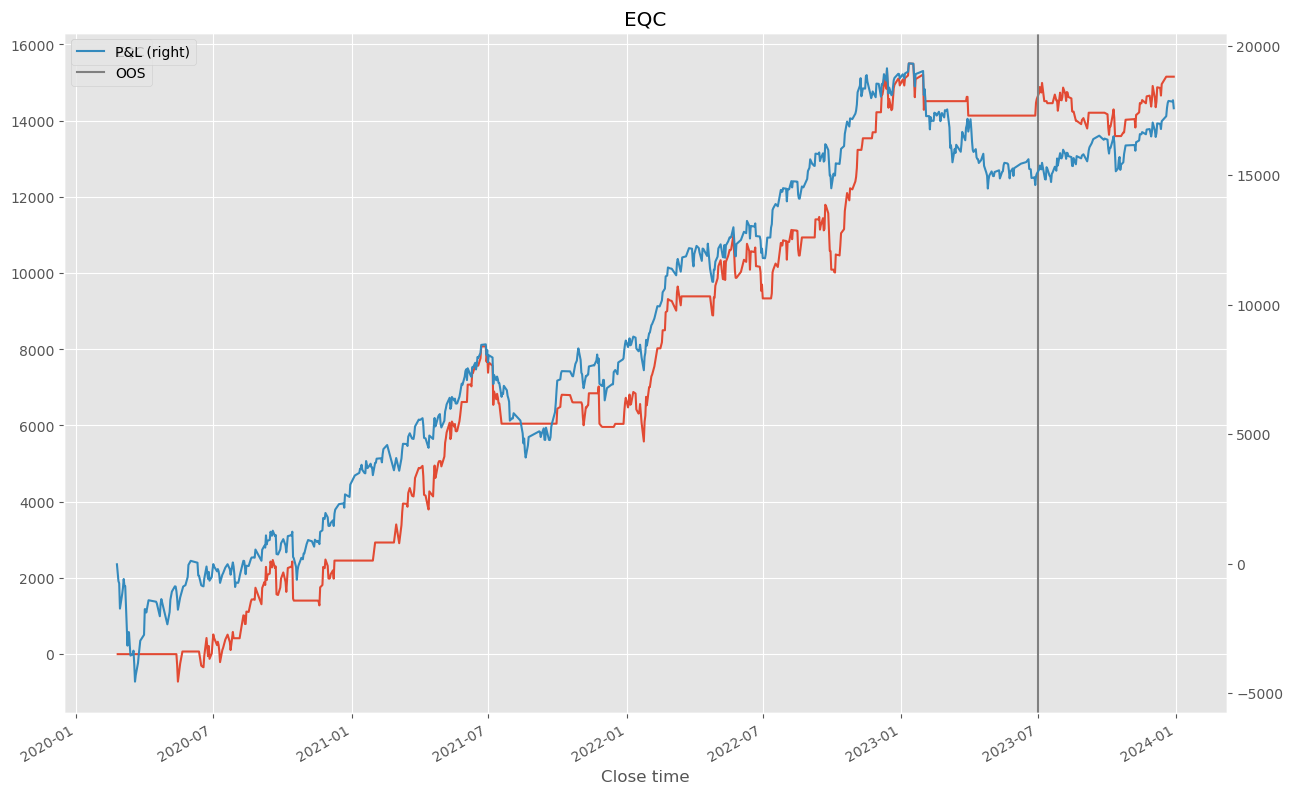

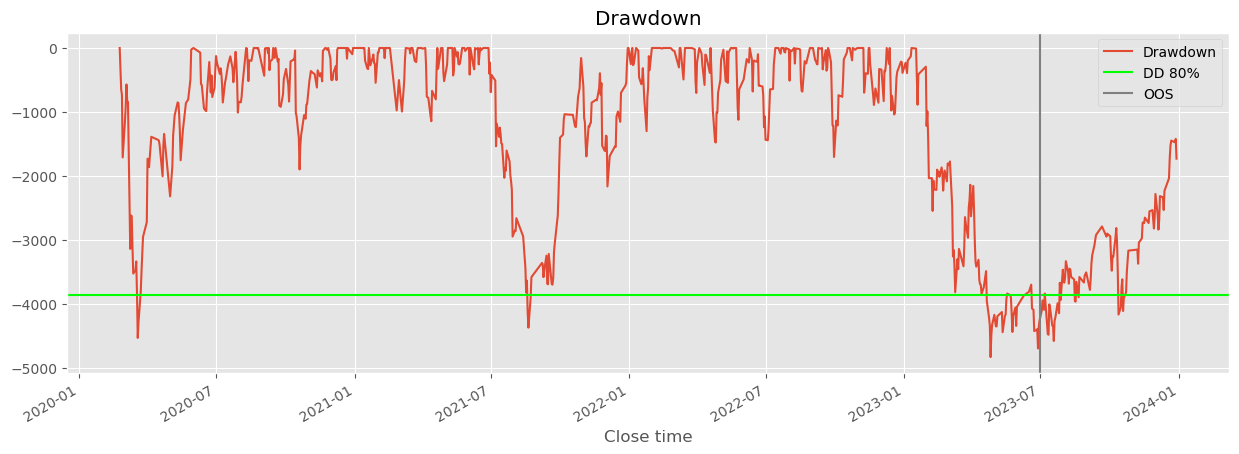

***      Risultati EQC      ***

Originale:              EQC:

Ret/DD: 3.64    ===>    6.07
Max_DD: 4828    ===>    2495

EQC: OK!

Check DD:
DD 80% IS: 3863
DD Real: 1729
Check DD 80%: True

Stato:


Close time
2023-12-27    0
2023-12-28    0
2023-12-29    0
Name: sng, dtype: int32

In [8]:
import random

n = random.randint(0,len(data.columns)-1)

i = data.columns[n]

df_comparations = data[i].to_frame("pnl").copy() 
df_comparations = df_comparations[df_comparations!=0].dropna()

for e in metric_list:
        df_comparations[e] = df_comparations.iloc[:,0].rolling(30).apply(eval(e))
        
df_comparations=df_comparations.dropna()
df=df_comparations.iloc[:,1:].copy()
filtered_df = df[(df >= df.loc[:OOS].quantile(0.15)) & (df <= df.loc[:OOS].quantile(0.85))]
filtered_df = filtered_df.fillna(0)
filtered_df[filtered_df>0]=1
filtered_df[filtered_df<0]=0
df_comparations["sng"]=filtered_df.sum(axis=1)
df_comparations["sng"]=np.where(df_comparations["sng"]> int(len(metric_list)*0.5) ,1,0)
df_comparations["nb"] = df_comparations["pnl"]*df_comparations["sng"].shift(1)
df_comparations["nb"].cumsum().plot(label = "EQC" , figsize=(15,10) , title="EQC")

plt.axvline(x=OOS,color='grey' , label = "OOS")
plt.legend(loc='upper right')
df_comparations["pnl"].cumsum().plot(secondary_y=True , label="P&L")
plt.legend(loc='upper left')
plt.show()

dd_80 = my_max_draw_down(df_comparations["pnl"].loc[:OOS]) * 0.8

my_drawdown(df_comparations["pnl"]).plot(figsize=(15,5) , title="Drawdown" , label="Drawdown")
plt.axhline(y=-dd_80 ,color='lime', linestyle='-' , label= "DD 80%")
plt.axvline(x=OOS,color='grey' , label = "OOS")
plt.legend()
plt.show()

print("***      Risultati EQC      ***")
print("")
new = df_comparations["nb"]
new=new[new!=0]
new_ret_dd = my_ret_dd(new)
new_max_dd = my_max_draw_down(new)
real_DD = -int(my_drawdown(df_comparations["pnl"]).iloc[-1])

print("Originale:              EQC:")
print("")
print("Ret/DD:" ,my_ret_dd(df_comparations["pnl"]) , "   ===>   " ,new_ret_dd)
print("Max_DD:" , int(my_max_draw_down(df_comparations["pnl"])) , "   ===>   " , int(new_max_dd) )
print("")
if (new_ret_dd > my_ret_dd(df_comparations["pnl"])) & (int(new_max_dd)<int(my_max_draw_down(df_comparations["pnl"]))):
    print("EQC: OK!")
else:
    print("EQC: FAIL!")
print("")
print("Check DD:")
print("DD 80% IS:" , int(dd_80))
print("DD Real:" , real_DD)
print("Check DD 80%:",  real_DD< dd_80)
print("")
print("Stato:")
df_comparations["sng"].tail(3)